### Dataset Source

Source - https://www.openml.org/d/1597


### Source:

#### Donor:

Andrea Dal Pozzolo, Olivier Caelen and Gianluca Bontempi
<br>Source: Credit card fraud detection - Date 25th of June 2015
<br>Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset present transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature ‘Amount’ is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML.

## Feature description

Class (target) nominal 2 unique values

Time (row identifier) numeric 

V1 numeric

V2 numeric

V3 numeric

V4 numeric

V5 numeric

V6 numeric

V7 numeric

V8 numeric

V9 numeric

V10 numeric

V11 numeric

V12 numeric

V13 numeric

V14 numeric

V15 numeric

V16 numeric

V17 numeric

V18 numeric

V19 numeric

V20 numeric

V21 numeric

V22 numeric

V23 numeric

V24 numeric

V25 numeric

V26 numeric

V27 numeric

V28 numeric

Amount numeric

## Problem Statement

Today, we will train an Autoencoder Neural Network (implemented in Keras) in unsupervised (or semi-supervised) fashion for Anomaly Detection in credit card transaction data. 

The trained model will be evaluated on pre-labeled and anonymized dataset.

__Dataset:__

It contains data about credit card transactions that occurred during a period of two days, with 492 frauds out of 284,807 transactions.

All variables in the dataset are numerical. The data has been transformed using PCA transformation(s) due to privacy reasons. The two features that haven't been changed are Time and Amount. 

Time contains the seconds elapsed between each transaction and the first transaction in the dataset.

### Loading the required libraries

In [1]:
#!pip install tensorflow==1.14

In [2]:
import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(143)
LABELS = ["Normal", "Fraud"]
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(tf.__version__)

2.2.0


# Task

Read the creditcard dataset

In [4]:
data = pd.read_csv("data/creditcard.csv")


# Task

Print the shape of the data

In [5]:
data.shape

(284807, 31)

#### Looking at a sample of records

In [6]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Exploratory Data Analysis

### Check the distribution of Target Column 

In [7]:
count_classes = pd.value_counts(data['Class'], sort = True)
print((count_classes/data.shape[0])*100)

0    99.827251
1     0.172749
Name: Class, dtype: float64


### Plot the frequencies of Target Column

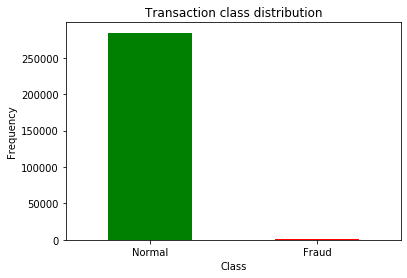

In [8]:
count_classes.plot(kind = 'bar', rot=0, color=['green','red'])

#Giving titles and labels to the plot

plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Check for missing values

In [10]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Analysis of Amount feature for Fraud and Non Fraud Transactions

In [11]:
frauds = data[data.Class == 1]
normal = data[data.Class == 0]

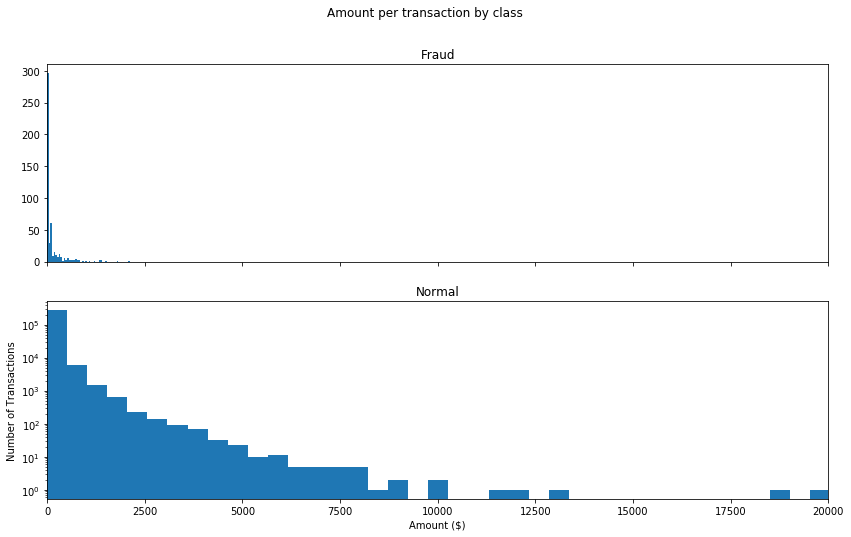

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14,8))
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

#### Observations

###### Transactions under Fraud and Non Fraud class doesnt have much difference

### Analysis of Time for Fraud And Non Fraud transactions

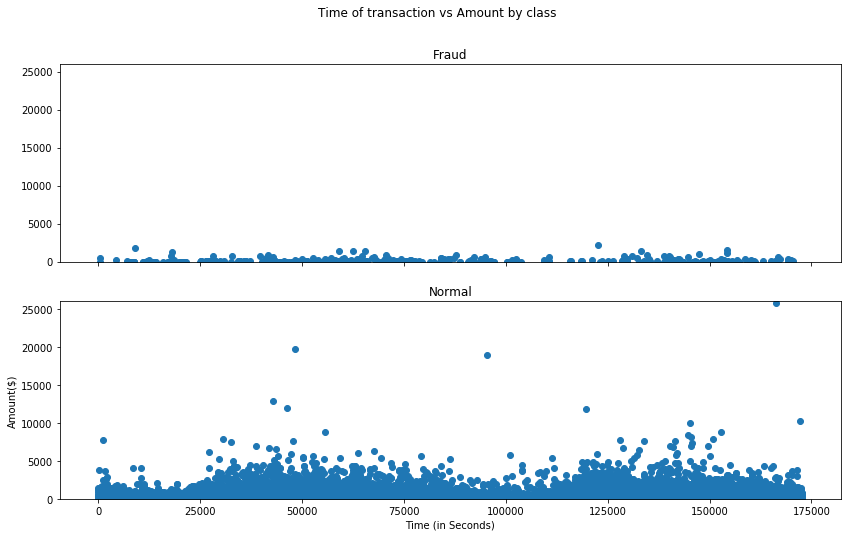

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14,8))
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')
ax1.set(ylim=(0, 26000))

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
ax2.set(ylim=(0, 26000))

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount($)')
plt.show()

#### Observations
###### Looks like time of transcations doesnt have any impact on Fraud or Non Fraud transactions 

In [14]:
data = data.drop(['Time'], axis=1)

## Auto Encoders

The job of auto encoders is to predict the input, given that same input. More specifically, let’s take a look at Autoencoder Neural Networks. This autoencoder tries to learn to approximate the following identity function:

$$\textstyle f_{W,b}(x) \approx x$$


While trying to do just that might sound trivial at first, it is important to note that we want to learn a __compressed representation of the data, thus find structure__. This can be done by limiting the number of hidden units in the model. Those kind of autoencoders are called undercomplete.

__Reconstruction error__
We optimize the parameters of our Autoencoder model in such way that a special kind of error - reconstruction error is minimized. In practice, the traditional squared error is often used:

$$\textstyle L(x,x') = ||\, x - x'||^2$$

#### Splitting the data into train and test and observing their dimensions

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 123)

print(f"The class distribution of train data is \n{(X_train['Class'].value_counts()/X_train.shape[0])*100}\n")
print(f"The class distribution of test data is \n{(X_test['Class'].value_counts()/X_test.shape[0])*100}")

The class distribution of train data is 
0    99.834537
1     0.165463
Name: Class, dtype: float64

The class distribution of test data is 
0    99.798111
1     0.201889
Name: Class, dtype: float64


In [16]:
## We are not dropping of target column from train dataset as lI would later need it to filter non fraudalent data

y_test = X_test['Class'] 
X_test = X_test.drop(['Class'], axis=1)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(227845, 30)
(56962, 29)
(56962,)


#### Scaling the Amount attribute

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train['Amount'].values.reshape(-1, 1))

X_train['Amount'] = scaler.transform(X_train['Amount'].values.reshape(-1, 1))
X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))

In [18]:
print(X_train.head(3))
print('\n----------------------------------------------------------------------------------')
print(X_test.head(3))

             V1        V2        V3        V4        V5        V6        V7  \
99168 -0.866221 -0.919624  2.020857 -1.525794 -1.035785  2.157966 -0.281997   
69460  0.967267 -0.179598  0.315800  1.354288 -0.273647  0.139429 -0.005874   
71073 -0.415673  1.080659  0.675844  0.789318  0.158613  0.430765  0.135873   

             V8        V9       V10  ...       V21       V22       V23  \
99168  0.608243 -0.595195 -0.192038  ...  0.511087  1.154578 -0.070794   
69460  0.174708  0.195502  0.040867  ... -0.015079 -0.078930 -0.131669   
71073  0.671417 -1.000854 -0.298512  ...  0.287891  0.782205  0.004812   

            V24       V25       V26       V27       V28    Amount  Class  
99168 -1.678518  0.511949  0.159084  0.044666  0.063497  0.556248      0  
69460 -0.001284  0.565061 -0.334174  0.013635  0.017108 -0.002494      0  
71073 -0.271442 -0.301717 -0.287004 -0.015223 -0.034233 -0.287905      0  

[3 rows x 30 columns]

--------------------------------------------------------------

#### Preparing the data for training

Training our Autoencoder is gonna be a bit different from what we are used to. 

Let's say you have a dataset containing a lot of non fraudulent transactions at hand. You want to detect any anomaly on new transactions. We will create this situation by training our model on the normal transactions, only.

Reserving the correct class on the test set will give us a way to evaluate the performance of our model.

#### Separating out the fraud records from the train 

In [19]:
X_train_NF = X_train[X_train['Class'] == 0] # non-fraud
X_train_NF = X_train_NF.drop(['Class'], axis=1)

X_train_NF = X_train_NF.values

print(X_train_NF.shape)
print(X_test.shape)
print(y_test.shape)

(227468, 29)
(56962, 29)
(56962,)


### Model Building

Our Autoencoder uses 4 fully connected layers with 29(no of input features), 14, 7, 14 and 29 (no of input features) neurons respectively. 

The first two layers are used for our encoder, the last two go for the decoder.

In [20]:
input_dim = X_train_NF.shape[1]

encoding_dim = 14

#### Create Model Graph

In [21]:
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="relu",kernel_regularizer=regularizers.l2(0.01))(input_layer) #activity_regularizer=l1(10e-5)
encoder = BatchNormalization()(encoder)
encoder = Dropout(0.1)(encoder)


encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(encoding_dim, activation="relu",kernel_regularizer=regularizers.l2(0.01))(encoder)
decoder = Dropout(0.1)(decoder)

decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [22]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
dense (Dense)                (None, 14)                420       
_________________________________________________________________
batch_normalization (BatchNo (None, 14)                56        
_________________________________________________________________
dropout (Dropout)            (None, 14)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 14)                112       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14)                0     

#### Compile and train the model

In [23]:
autoencoder.compile(optimizer = 'adam', 
                    loss = 'mean_squared_error', 
                    metrics = ['mse'])

hist = autoencoder.fit(X_train_NF, 
                       X_train_NF, 
                       epochs = 10, 
                       batch_size = 128, 
                       shuffle = True, 
                       validation_split = 0.3, 
                       verbose = 1)

Epoch 1/10
1244/1244 [==============================] - 5s 4ms/step - loss: 0.8364 - mse: 0.7732 - val_loss: 0.5458 - val_mse: 0.5218
Epoch 2/10
1244/1244 [==============================] - 4s 4ms/step - loss: 0.6118 - mse: 0.5922 - val_loss: 0.4804 - val_mse: 0.4633
Epoch 3/10
1244/1244 [==============================] - 4s 3ms/step - loss: 0.5728 - mse: 0.5571 - val_loss: 0.4466 - val_mse: 0.4321
Epoch 4/10
1244/1244 [==============================] - 4s 4ms/step - loss: 0.5528 - mse: 0.5391 - val_loss: 0.4294 - val_mse: 0.4169
Epoch 5/10
1244/1244 [==============================] - 4s 3ms/step - loss: 0.5399 - mse: 0.5277 - val_loss: 0.4222 - val_mse: 0.4103
Epoch 6/10
1244/1244 [==============================] - 4s 3ms/step - loss: 0.5319 - mse: 0.5206 - val_loss: 0.4116 - val_mse: 0.4008
Epoch 7/10
1244/1244 [==============================] - 4s 3ms/step - loss: 0.5218 - mse: 0.5112 - val_loss: 0.4018 - val_mse: 0.3905
Epoch 8/10
1244/1244 [==============================] - 4s 3ms

#### (Train Loss, Validation Loss) Vs Epochs

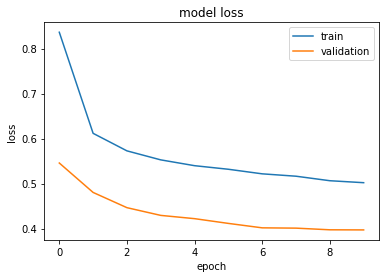

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right');

### Obtaining predictions for non fraud records

In [25]:
test_pred = autoencoder.predict(X_test.values)

In [26]:
test_pred[0:1,:]

array([[-0.19875436,  0.85082436,  1.0339924 ,  0.7301302 ,  0.24485268,
        -0.3003781 ,  0.35180607,  0.08174983, -0.4860674 ,  0.00121406,
        -0.0150326 , -0.01707163,  0.0358239 ,  0.3107249 ,  0.17177403,
        -0.04868969, -0.15758839, -0.03088202,  0.17761512,  0.11208535,
         0.00955926, -0.06437331,  0.02563675, -0.02023465, -0.14349432,
        -0.00887483,  0.00275422,  0.00465616, -0.26884237]],
      dtype=float32)

#### Computing reconstruction error on non-fraud data

In [27]:
test_errors = np.mean(np.square(np.abs(X_test - test_pred)), axis = 1)

test_errors[0:5]

73129     0.160436
229597    0.329275
220218    0.128092
198374    0.626726
167980    0.347246
dtype: float64

In [28]:
mse = np.mean(np.power(X_test - test_pred, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [29]:
error_df.head(10)

,reconstruction_error,true_class
73129,0.160436,0
229597,0.329275,0
220218,0.128092,0
198374,0.626726,0
167980,0.347246,0
98465,0.440579,0
200436,0.384277,0
113404,0.358363,0
149063,0.757180,0
41420,0.257416,0


### Experimentation to fix a threshold for classification of a transaction into fraud or non-fraud

In [30]:
print(f"The test errors shape is {test_errors.shape}\n------------------------")
print(f"The test errors are {test_errors}\n------------------------")

train_pred = autoencoder.predict(X_train_NF)
mean_train_error = np.mean(np.square(np.abs(train_pred - X_train_NF)), axis=1).mean()

print(f"\nThe mean train error value is {mean_train_error}")

The test errors shape is (56962,)
------------------------
The test errors are 73129     0.160436
229597    0.329275
220218    0.128092
198374    0.626726
167980    0.347246
            ...   
65068     0.182700
200729    0.124658
166463    0.288967
227195    0.450346
200090    1.657934
Length: 56962, dtype: float64
------------------------

The mean train error value is 0.39050806487771694


In [31]:
y_test.values[48]==True

True

In [32]:
from sklearn.metrics import f1_score,confusion_matrix, classification_report

scores_f1 = []
thres = []

th = 0
for i in range(200):
    th+=0.1
    fraud = list((test_errors > mean_train_error+th))
    scores_f1.append(f1_score(y_test,fraud))
    thres.append(th+mean_train_error)

In [33]:
print(type(test_errors))
print(test_errors.shape)
print(y_test.shape)
print(type(y_test))
print(type(fraud))

<class 'pandas.core.series.Series'>
(56962,)
(56962,)
<class 'pandas.core.series.Series'>
<class 'list'>


In [34]:
np.unique(fraud)

array([False,  True])

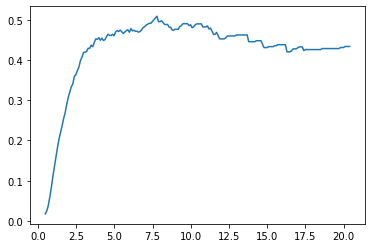

In [35]:
plt.plot(thres, scores_f1)

In [36]:
np.array(scores_f1).argmax()

73

In [37]:
scores_f1[59]

0.47154471544715443

In [38]:
print(thres[np.array(scores_f1).argmax()])

fraud1 = (test_errors > thres[np.array(scores_f1).argmax()])

print(confusion_matrix(y_test, fraud1))

print(classification_report(y_test, fraud1))

7.790508064877707
[[56795    52]
 [   58    57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.52      0.50      0.51       115

    accuracy                           1.00     56962
   macro avg       0.76      0.75      0.75     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
threshold = thres[np.array(scores_f1).argmax()]
print(threshold)

7.790508064877707


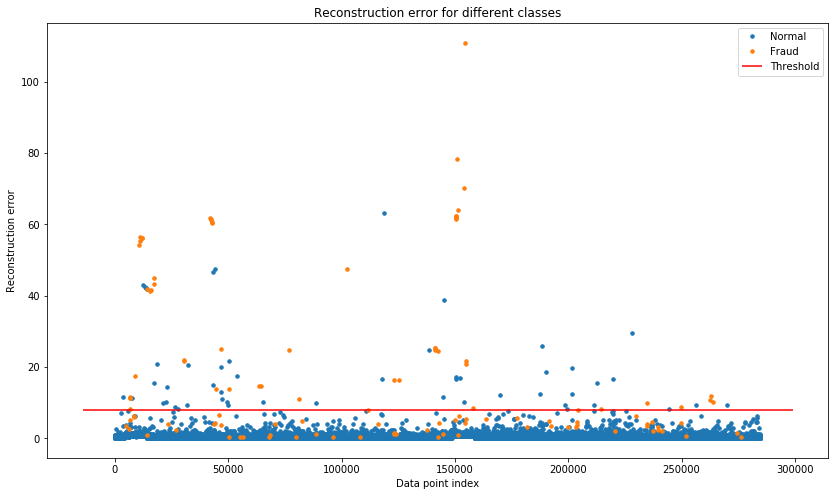

In [40]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))

for name, group in groups:
    ax.plot(tuple(group.index), tuple(group.reconstruction_error), marker='o', ms=3.5, linestyle='',
           label= "Fraud" if name == 1 else "Normal")#
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

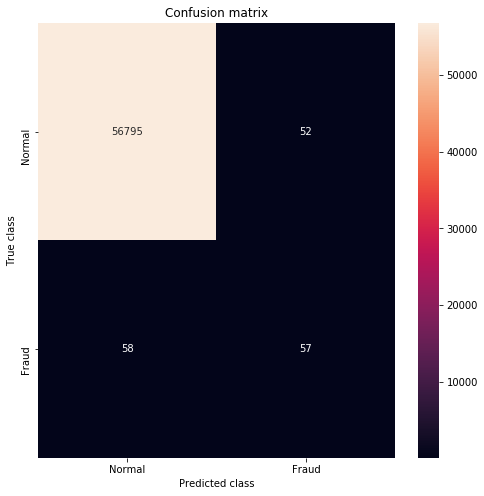

In [41]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Conclusion

Our model seems to catch a lot of the fraudulent cases. The number of normal transactions classified as frauds is low as well (False Positives). Similarly the number of fraud transactions classified as Normal transactions is low as well. You might want to increase or decrease the value of the threshold, depending on the problem.

We've created a very simple Deep Autoencoder in Keras that can reconstruct what non fraudulent transactions looks like. We gave a lot of normal transactions to a model and it learned (somewhat) how to discriminate whether or not new examples belong to that same class.